In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Loading data

In [2]:
#real_time_sampled_nodes = pd.DataFrame(pd.read_csv("raw_files/BUSNODES_DTSL_PROJECT_RT.csv"))
#real_time_sampled_nodes

In [3]:
#day_ahead_sampled_nodes = pd.DataFrame(pd.read_csv("raw_files/project_nodes_da.csv"))
#day_ahead_sampled_nodes

In [4]:
#spoints_da = pd.DataFrame(pd.read_csv("raw_files/spoints_da.csv"))
#spoints_da

In [5]:
#spoints_rt = pd.DataFrame(pd.read_csv("raw_files/spoints_rt.csv"))
#spoints_rt

# Processing Spoints Real Time

In [6]:
spoints_rt = pd.DataFrame(pd.read_csv("raw_files/rt_spoints_ercot.csv"))
#spoints_rt
#getting rid of uneccesary column
spoints_rt = spoints_rt.iloc[:, 1:]
#renaming columns
spoints_rt.columns = ["DateTime", "Point", "Hub", "LMP", "DaylightSavings"]


In [7]:
#"Unmelting"
spoints_rt = spoints_rt.pivot_table(values = "LMP", index=['DateTime', 'DaylightSavings'], columns='Point')
spoints_rt.head(10)

,Point,HB_NORTH,LZ_RAYBN
DateTime,DaylightSavings,,
2013-01-01 01:00:00,N,21.6650,21.6650
2013-01-01 02:00:00,N,21.2225,21.2225
2013-01-01 03:00:00,N,20.7950,20.7950
2013-01-01 04:00:00,N,20.0950,20.0950
2013-01-01 05:00:00,N,19.8700,19.8700
2013-01-01 06:00:00,N,20.0950,20.0950
2013-01-01 07:00:00,N,22.3575,22.3575
2013-01-01 08:00:00,N,21.6075,21.6075
2013-01-01 09:00:00,N,21.9950,21.9950


In [8]:
#any NaN?
print(spoints_rt.iloc[np.where(spoints_rt.isnull())])

#Let's replace with mean of previous and last:
print(np.where(spoints_rt.isnull()))

spoints_rt.iloc[10460, 1] = np.mean([spoints_rt.iloc[10460 - 1, 1], spoints_rt.iloc[10460+1, 1]])

spoints_rt.iloc[16787, 0] = np.mean([spoints_rt.iloc[16787 - 1, 1], spoints_rt.iloc[16787+1, 0]])
print(spoints_rt.iloc[np.where(spoints_rt.isnull())])
#Looks good!
spoints_rt = spoints_rt.reset_index()


Point                                LZ_RAYBN
DateTime            DaylightSavings          
2014-03-31 20:00:00 N                     NaN
(array([10460]), array([1]))
Empty DataFrame
Columns: []
Index: []


In [9]:
spoints_rt.DateTime = pd.to_datetime(spoints_rt.DateTime)
spoints_rt = spoints_rt.iloc[np.where(spoints_rt.DateTime > pd.to_datetime("2014-01-01 00:00:00"))]
spoints_rt.columns = spoints_rt.columns + "_RealTime"
spoints_rt = spoints_rt.rename(index=str, columns={"DateTime_RealTime": "DateTime", "DaylightSavings_RealTime": "DaylightSavings"})
spoints_rt.shape

(28677, 4)

# Processing SPoints Day Ahead

In [10]:
#Similar as above
spoints_da = pd.DataFrame(pd.read_csv("raw_files/spoints_da.csv"))
#spoints_da

spoints_da = pd.DataFrame(pd.read_csv("raw_files/spoints_da.csv"))
spoints_da = spoints_da.iloc[:, 1:]
#spoints_da.head(20)
spoints_da.columns = ["Date", "Hour", "Node", "LMP", "DaylightSavings"]
#print(spoints_da["Date"] + ' ' + spoints_da["Hour"])
spoints_da["DateTime"] = pd.to_datetime(spoints_da["Date"] + ' ' + spoints_da["Hour"], errors="coerce")
spoints_da = spoints_da.pivot_table(values = "LMP", index=['DateTime'], columns='Node')
spoints_da = spoints_da.drop("LZ_NORTH", 1)
spoints_da = spoints_da.reset_index()
spoints_da.DateTime = pd.to_datetime(spoints_da.DateTime)
spoints_da.columns = spoints_da.columns + "_DayAhead"
spoints_da = spoints_da.rename(index=str, columns={"DateTime_DayAhead": "DateTime"})
spoints_da.head(20)

,DateTime,HB_NORTH_DayAhead,LZ_RAYBN_DayAhead
0,2014-01-01 01:00:00,28.17,28.20
1,2014-01-01 02:00:00,25.07,25.10
2,2014-01-01 03:00:00,24.93,24.96
3,2014-01-01 04:00:00,24.92,24.96
4,2014-01-01 05:00:00,25.07,25.11
5,2014-01-01 06:00:00,27.23,27.33
6,2014-01-01 07:00:00,36.17,36.55
7,2014-01-01 08:00:00,38.19,38.58
8,2014-01-01 09:00:00,40.14,40.52
9,2014-01-01 10:00:00,34.74,34.89


# Processing da sample nodes

In [11]:
day_ahead_sampled_nodes = pd.DataFrame(pd.read_csv("raw_files/project_nodes_da.csv"))
#day_ahead_sampled_nodes
day_ahead_sampled_nodes = pd.DataFrame(pd.read_csv("raw_files/project_nodes_da.csv"))
#day_ahead_sampled_nodes
day_ahead_sampled_nodes.head()

,2014-01-02,1:00:00,AMELIA2_8W,24.500,N,361
0,2014-01-02,2:00:00,AMELIA2_8W,23.50,N,361
1,2014-01-02,3:00:00,AMELIA2_8W,23.50,N,361
2,2014-01-02,4:00:00,AMELIA2_8W,24.50,N,361
3,2014-01-02,5:00:00,AMELIA2_8W,25.88,N,361
4,2014-01-02,6:00:00,AMELIA2_8W,32.34,N,361


In [12]:
day_ahead_sampled_nodes.columns = ["Date", "Hour", "Node", "LMP", "DaylightSavings", "Tag"]

day_ahead_sampled_nodes["DateTime"] = pd.to_datetime(day_ahead_sampled_nodes["Date"] + ' ' + day_ahead_sampled_nodes["Hour"], errors="coerce")
day_ahead_sampled_nodes = day_ahead_sampled_nodes.pivot_table(values = "LMP", index=['DateTime'], columns='Node')
day_ahead_sampled_nodes = day_ahead_sampled_nodes.reset_index()
day_ahead_sampled_nodes.DateTime = pd.to_datetime(day_ahead_sampled_nodes.DateTime)
day_ahead_sampled_nodes.columns = day_ahead_sampled_nodes.columns + "_DayAhead"
day_ahead_sampled_nodes = day_ahead_sampled_nodes.rename(index=str, columns={"DateTime_DayAhead": "DateTime"})
day_ahead_sampled_nodes.head()

,DateTime,AMELIA2_8W_DayAhead,APOLLO_DayAhead,CEDARHILL_DayAhead,CENTURY4_5Q_DayAhead,CHAPSTLML_8Z_DayAhead,CHILSW_N8_DayAhead,COMM_SW_8_DayAhead,CROWN1_8Z_DayAhead,DESHPR1_8U_DayAhead,...,TEASELVL_8W_DayAhead,TEGMN_K_DayAhead,TOURS_TY_DayAhead,TRSES_3969_DayAhead,TWINSTAR_8_DayAhead,TYLRBUL_8X_DayAhead,WACOBLMD1_8W_DayAhead,WAX_9_DayAhead,WINKLER_L_A_DayAhead,WOODROW69W_DayAhead
0,2014-01-02 01:00:00,NaN,24.50,24.50,24.50,24.50,24.50,24.50,24.50,24.50,...,24.50,24.49,24.50,24.50,24.50,24.50,24.50,24.50,24.50,24.95
1,2014-01-02 02:00:00,23.50,23.50,23.50,23.50,23.50,23.50,23.50,23.50,23.50,...,23.50,23.50,23.50,23.50,23.50,23.50,23.50,23.50,23.50,23.95
2,2014-01-02 03:00:00,23.50,23.50,23.50,23.50,23.50,23.50,23.50,23.50,23.50,...,23.50,23.50,23.49,23.50,23.50,23.50,23.49,23.50,23.50,23.95
3,2014-01-02 04:00:00,24.50,24.50,24.50,24.50,24.50,24.50,24.50,24.50,24.50,...,24.50,24.50,24.49,24.50,24.50,24.50,24.49,24.49,24.50,24.95
4,2014-01-02 05:00:00,25.88,25.88,25.88,25.88,25.88,25.88,25.88,25.88,25.88,...,25.88,25.88,25.87,25.88,25.88,25.88,25.87,25.88,25.88,26.34


# Processing rt sample nodes

In [13]:
real_time_sampled_nodes = pd.DataFrame(pd.read_csv("raw_files/BUSNODES_DTSL_PROJECT_RT.csv"))
#real_time_sampled_nodes
real_time_sampled_nodes = real_time_sampled_nodes.iloc[:, 1:]
real_time_sampled_nodes.columns = ["DateTime", "Node", "Tag", "LMP", "DaylightSavings"]
real_time_sampled_nodes.DateTime = pd.to_datetime(real_time_sampled_nodes.DateTime)

real_time_sampled_nodes.head(20)

,DateTime,Node,Tag,LMP,DaylightSavings
0,2014-01-25 23:25:06,AMELIA2_8W,361,25.31,N
1,2014-01-25 23:25:06,APOLLO,433,25.31,N
2,2014-01-25 23:25:06,CEDARHILL,1556,25.31,N
3,2014-01-25 23:25:06,CENTURY4_5Q,1604,25.31,N
4,2014-01-25 23:25:06,CHAPSTLML_8Z,1658,25.31,N
5,2014-01-25 23:25:06,CHILSW_N8,1706,25.31,N
6,2014-01-25 23:25:06,COMM_SW_8,1916,25.31,N
7,2014-01-25 23:25:06,CROWN1_8Z,2127,25.31,N
8,2014-01-25 23:25:06,DESHPR1_8U,2377,25.31,N
9,2014-01-25 23:25:06,DUCKCK1_8,2572,25.31,N


In [14]:
#rounding to nearest hour
#real_time_sampled_nodes.DateTime = real_time_sampled_nodes.DateTime + timedelta(minutes = 30)
#real_time_sampled_nodes.DateTime.replace(microsecond=0,second=0,minute=0)
real_time_sampled_nodes.DateTime = real_time_sampled_nodes.DateTime.apply(lambda dt: datetime.datetime(dt.year, 
                                                                                                       dt.month,
                                                                                                       dt.day, 
                                                                                                       dt.hour))
real_time_sampled_nodes.head()

,DateTime,Node,Tag,LMP,DaylightSavings
0,2014-01-25 23:00:00,AMELIA2_8W,361,25.31,N
1,2014-01-25 23:00:00,APOLLO,433,25.31,N
2,2014-01-25 23:00:00,CEDARHILL,1556,25.31,N
3,2014-01-25 23:00:00,CENTURY4_5Q,1604,25.31,N
4,2014-01-25 23:00:00,CHAPSTLML_8Z,1658,25.31,N


In [15]:

real_time_sampled_nodes = real_time_sampled_nodes.pivot_table(values = "LMP", index=['DateTime'], columns='Node')


In [16]:
#real_time_sampled_nodes = real_time_sampled_nodes.groupby("DateTime", axis = 1).mean()
real_time_sampled_nodes = real_time_sampled_nodes.reset_index()
real_time_sampled_nodes.DateTime = pd.to_datetime(real_time_sampled_nodes.DateTime)
real_time_sampled_nodes.head()

Node,DateTime,AMELIA2_8W,APOLLO,CEDARHILL,CENTURY4_5Q,CHAPSTLML_8Z,CHILSW_N8,COMM_SW_8,CROWN1_8Z,DESHPR1_8U,...,TEASELVL_8W,TEGMN_K,TOURS_TY,TRSES_3969,TWINSTAR_8,TYLRBUL_8X,WACOBLMD1_8W,WAX_9,WINKLER_L_A,WOODROW69W
0,2014-01-01 00:00:00,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,...,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500
1,2014-01-01 01:00:00,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,...,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667
2,2014-01-01 02:00:00,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,...,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333
3,2014-01-01 03:00:00,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,...,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667
4,2014-01-01 04:00:00,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,...,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333


In [17]:
real_time_sampled_nodes.columns = real_time_sampled_nodes.columns + "_RealTime"
real_time_sampled_nodes = real_time_sampled_nodes.rename(index=str, columns={"DateTime_RealTime": "DateTime"})
real_time_sampled_nodes.head()

,DateTime,AMELIA2_8W_RealTime,APOLLO_RealTime,CEDARHILL_RealTime,CENTURY4_5Q_RealTime,CHAPSTLML_8Z_RealTime,CHILSW_N8_RealTime,COMM_SW_8_RealTime,CROWN1_8Z_RealTime,DESHPR1_8U_RealTime,...,TEASELVL_8W_RealTime,TEGMN_K_RealTime,TOURS_TY_RealTime,TRSES_3969_RealTime,TWINSTAR_8_RealTime,TYLRBUL_8X_RealTime,WACOBLMD1_8W_RealTime,WAX_9_RealTime,WINKLER_L_A_RealTime,WOODROW69W_RealTime
0,2014-01-01 00:00:00,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,...,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500,24.672500
1,2014-01-01 01:00:00,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,...,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667,24.521667
2,2014-01-01 02:00:00,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,...,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333,24.198333
3,2014-01-01 03:00:00,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,...,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667,24.041667
4,2014-01-01 04:00:00,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,...,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333,24.128333


# Joining the data, saving file

In [18]:
merged_data = pd.merge(spoints_rt, spoints_da, on = "DateTime")
merged_data = pd.merge(merged_data, real_time_sampled_nodes, on = "DateTime")
merged_data = pd.merge(merged_data, day_ahead_sampled_nodes, on = "DateTime")

merged_data.tail()
#merged_data.to_csv("real_time_grid_data.csv")

,DateTime,DaylightSavings,HB_NORTH_RealTime,LZ_RAYBN_RealTime,HB_NORTH_DayAhead,LZ_RAYBN_DayAhead,AMELIA2_8W_RealTime,APOLLO_RealTime,CEDARHILL_RealTime,CENTURY4_5Q_RealTime,...,TEASELVL_8W_DayAhead,TEGMN_K_DayAhead,TOURS_TY_DayAhead,TRSES_3969_DayAhead,TWINSTAR_8_DayAhead,TYLRBUL_8X_DayAhead,WACOBLMD1_8W_DayAhead,WAX_9_DayAhead,WINKLER_L_A_DayAhead,WOODROW69W_DayAhead
28645,2017-05-31 19:00:00,N,28.0350,32.94250,30.60,30.58,23.614167,23.781667,22.776667,23.691667,...,30.67,30.70,30.59,30.69,30.56,30.67,30.58,30.71,30.69,NaN
28646,2017-05-31 20:00:00,N,22.7175,23.55375,30.64,30.64,21.670000,21.697500,21.681667,21.726667,...,30.64,30.64,30.55,30.64,30.64,30.64,30.56,30.58,30.63,NaN
28647,2017-05-31 21:00:00,N,21.6800,21.67250,27.38,27.38,21.575833,21.595000,21.624167,21.629167,...,27.33,27.26,27.41,27.31,27.39,27.33,27.43,27.35,27.32,NaN
28648,2017-05-31 22:00:00,N,21.6250,21.58125,25.17,25.17,21.320000,21.333333,21.355000,21.357500,...,25.15,25.11,25.12,25.14,25.18,25.15,25.13,25.13,25.14,NaN
28649,2017-05-31 23:00:00,N,21.3700,21.32500,24.22,24.22,21.313333,21.317500,21.324167,21.325000,...,24.18,24.13,24.28,24.18,24.22,24.19,24.28,24.24,24.18,NaN


In [19]:
len(pd.unique(merged_data.DateTime))

28647

# Loading weather data:

In [20]:
weather = pd.DataFrame(pd.read_csv("raw_files/weather_data.csv"))
weather.DateTime = pd.to_datetime(weather.DateTime)
weather.head()

,Unnamed: 0,USAF,DateTime,DIR,SPD,GUS,CLG,SKC,VSB,TEMP,DEWP,SLP,ALT,STP,PCP01,PCP06,PCP24
0,254780,722590,2014-01-01 01:00:00,150.0,9.0,NaN,722.0,CLR,10.0,43.0,27.0,1024.6,30.25,1002.5,0.0,NaN,NaN
1,254781,722590,2014-01-01 02:00:00,140.0,6.0,NaN,722.0,CLR,10.0,42.0,27.0,1024.8,30.25,1002.5,0.0,NaN,NaN
2,254782,722590,2014-01-01 03:00:00,160.0,9.0,NaN,722.0,CLR,10.0,43.0,27.0,1024.2,30.24,1002.2,0.0,NaN,NaN
3,254784,722590,2014-01-01 04:00:00,170.0,11.0,NaN,722.0,CLR,10.0,43.0,26.0,1023.4,30.22,1001.5,0.0,NaN,NaN
4,254785,722590,2014-01-01 05:00:00,160.0,9.0,NaN,722.0,CLR,10.0,41.0,26.0,1023.5,30.22,1001.5,0.0,NaN,NaN


In [21]:
merged_data = pd.merge(merged_data, weather, on = "DateTime")
merged_data.head()

,DateTime,DaylightSavings,HB_NORTH_RealTime,LZ_RAYBN_RealTime,HB_NORTH_DayAhead,LZ_RAYBN_DayAhead,AMELIA2_8W_RealTime,APOLLO_RealTime,CEDARHILL_RealTime,CENTURY4_5Q_RealTime,...,SKC,VSB,TEMP,DEWP,SLP,ALT,STP,PCP01,PCP06,PCP24
0,2014-01-02 01:00:00,N,20.6950,20.69500,24.50,24.50,21.238333,21.238333,21.238333,21.238333,...,NaN,10.0,61.0,44.0,1013.3,29.93,991.9,0.0,NaN,NaN
1,2014-01-02 02:00:00,N,21.2375,21.23750,23.50,23.50,21.915833,21.915833,21.915833,21.915833,...,NaN,10.0,57.0,31.0,1015.5,29.99,993.9,0.0,NaN,NaN
2,2014-01-02 03:00:00,N,21.9175,21.91750,23.50,23.50,22.850833,22.850833,22.850833,22.850833,...,CLR,10.0,49.0,33.0,1017.9,30.06,996.2,0.0,NaN,NaN
3,2014-01-02 04:00:00,N,22.8475,22.84750,24.50,24.50,24.999167,24.999167,24.999167,24.999167,...,CLR,10.0,41.0,29.0,1020.3,30.13,998.5,0.0,NaN,NaN
4,2014-01-02 05:00:00,N,24.9975,24.99875,25.88,25.88,26.311667,26.311667,26.311667,26.311667,...,CLR,10.0,36.0,25.0,1022.1,30.18,1000.2,0.0,NaN,NaN


# Loading oil and gas prices:

In [22]:
fossils = pd.DataFrame(pd.read_csv("raw_files/DailyGasOil.csv"))
fossils = fossils.iloc[::-1]

fossils["DateTime"] = pd.to_datetime(fossils['Day'] + " " + fossils['Hour'], format="%m/%d/%Y %H:%M:00").dt.strftime("%Y-%m-%d %H:%M:00")
fossils.head()
fossils = fossils.drop(["Day", "Hour"], 1)
fossils.index = pd.DatetimeIndex(fossils.DateTime)

idx = pd.date_range(start = "2014-01-01 01:00:00", end = "2017-05-31 23:00:00", freq = "H")
fossils = fossils.reindex(idx)
fossils.DateTime = fossils.index
fossils = fossils.fillna(method="pad")
fossils = fossils.fillna(method="backfill")

fossils.head(100)

,GasSpotPrice,GasPriceDailyVariation,GasTradedVolume,OilBarrelPrice,DateTime
2014-01-01 01:00:00,4.32,93.61,134634.0,93.61,2014-01-01 01:00:00
2014-01-01 02:00:00,4.32,93.61,134634.0,93.61,2014-01-01 02:00:00
2014-01-01 03:00:00,4.32,93.61,134634.0,93.61,2014-01-01 03:00:00
2014-01-01 04:00:00,4.32,93.61,134634.0,93.61,2014-01-01 04:00:00
2014-01-01 05:00:00,4.32,93.61,134634.0,93.61,2014-01-01 05:00:00
2014-01-01 06:00:00,4.32,93.61,134634.0,93.61,2014-01-01 06:00:00
2014-01-01 07:00:00,4.32,93.61,134634.0,93.61,2014-01-01 07:00:00
2014-01-01 08:00:00,4.32,93.61,134634.0,93.61,2014-01-01 08:00:00
2014-01-01 09:00:00,4.32,93.61,134634.0,93.61,2014-01-01 09:00:00
2014-01-01 10:00:00,4.32,93.61,134634.0,93.61,2014-01-01 10:00:00


In [23]:

merged_data = pd.merge(merged_data, fossils, on = "DateTime")
merged_data.head(10)

,DateTime,DaylightSavings,HB_NORTH_RealTime,LZ_RAYBN_RealTime,HB_NORTH_DayAhead,LZ_RAYBN_DayAhead,AMELIA2_8W_RealTime,APOLLO_RealTime,CEDARHILL_RealTime,CENTURY4_5Q_RealTime,...,SLP,ALT,STP,PCP01,PCP06,PCP24,GasSpotPrice,GasPriceDailyVariation,GasTradedVolume,OilBarrelPrice
0,2014-01-02 01:00:00,N,20.6950,20.69500,24.50,24.50,21.238333,21.238333,21.238333,21.238333,...,1013.3,29.93,991.9,0.0,NaN,NaN,4.32,93.61,134634.0,93.61
1,2014-01-02 02:00:00,N,21.2375,21.23750,23.50,23.50,21.915833,21.915833,21.915833,21.915833,...,1015.5,29.99,993.9,0.0,NaN,NaN,4.32,93.61,134634.0,93.61
2,2014-01-02 03:00:00,N,21.9175,21.91750,23.50,23.50,22.850833,22.850833,22.850833,22.850833,...,1017.9,30.06,996.2,0.0,NaN,NaN,4.32,93.61,134634.0,93.61
3,2014-01-02 04:00:00,N,22.8475,22.84750,24.50,24.50,24.999167,24.999167,24.999167,24.999167,...,1020.3,30.13,998.5,0.0,NaN,NaN,4.32,93.61,134634.0,93.61
4,2014-01-02 05:00:00,N,24.9975,24.99875,25.88,25.88,26.311667,26.311667,26.311667,26.311667,...,1022.1,30.18,1000.2,0.0,NaN,NaN,4.32,93.61,134634.0,93.61
5,2014-01-02 06:00:00,N,26.3125,26.31250,32.28,32.47,29.109167,29.109167,29.115833,29.110000,...,1023.2,30.22,1001.5,0.0,NaN,NaN,4.32,93.61,134634.0,93.61
6,2014-01-02 07:00:00,N,29.0950,29.09875,44.46,45.09,50.694167,50.702500,50.771667,50.711667,...,1024.0,30.24,1002.2,0.0,NaN,NaN,4.32,93.61,134634.0,93.61
7,2014-01-02 08:00:00,N,50.6875,50.69750,46.50,47.38,61.160000,61.170833,61.540000,61.192500,...,1025.1,30.27,1003.2,0.0,NaN,NaN,4.32,93.61,134634.0,93.61
8,2014-01-02 09:00:00,N,60.9725,60.96250,40.00,40.51,43.566667,43.569167,43.752500,43.577500,...,1026.8,30.32,1004.8,0.0,NaN,NaN,4.32,93.61,134634.0,93.61
9,2014-01-02 10:00:00,N,43.7725,43.77875,35.20,35.67,80.575000,80.586667,81.357500,80.618333,...,1027.3,30.34,1005.5,0.0,NaN,NaN,4.32,93.61,134634.0,93.61


In [24]:
merged_data.to_csv("cleaned_data/all_the_data.csv")

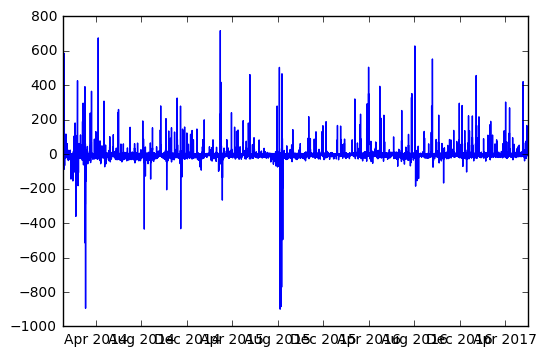

In [25]:
plt.plot(merged_data.DateTime, merged_data.HB_NORTH_RealTime - merged_data.HB_NORTH_DayAhead)
plt.show()

In [26]:
np.mean(merged_data.LZ_RAYBN_RealTime - merged_data.LZ_RAYBN_DayAhead)

-1.4799797556718919

In [27]:
merged_data.iloc[np.where(merged_data.DateTime > "2015-01-01 01:00:00")]

,DateTime,DaylightSavings,HB_NORTH_RealTime,LZ_RAYBN_RealTime,HB_NORTH_DayAhead,LZ_RAYBN_DayAhead,AMELIA2_8W_RealTime,APOLLO_RealTime,CEDARHILL_RealTime,CENTURY4_5Q_RealTime,...,SLP,ALT,STP,PCP01,PCP06,PCP24,GasSpotPrice,GasPriceDailyVariation,GasTradedVolume,OilBarrelPrice
8369,2015-01-01 02:00:00,N,22.3050,22.30500,21.45,21.42,22.205000,22.205000,22.205000,22.205000,...,1032.2,30.47,1009.8,0.00,NaN,NaN,3.14,66.73,144384.0,66.73
8370,2015-01-01 03:00:00,N,22.2025,22.20250,21.16,21.15,22.125833,22.125833,22.125833,22.125833,...,1032.1,30.47,1009.8,0.00,NaN,NaN,3.14,66.73,144384.0,66.73
8371,2015-01-01 04:00:00,N,22.1275,22.12750,20.95,20.93,22.155833,22.155833,22.155833,22.155833,...,1032.0,30.47,1009.8,0.00,NaN,NaN,3.14,66.73,144384.0,66.73
8372,2015-01-01 05:00:00,N,22.1550,22.15500,21.38,21.36,22.611667,22.611667,22.611667,22.611667,...,1031.1,30.44,1008.8,0.00,NaN,NaN,3.14,66.73,144384.0,66.73
8373,2015-01-01 06:00:00,N,22.6100,22.61000,24.72,24.71,23.381667,23.381667,23.381667,23.381667,...,1030.0,30.41,1007.8,0.00,0.00,NaN,3.14,66.73,144384.0,66.73
8374,2015-01-01 07:00:00,N,23.3800,23.38000,26.61,26.83,23.778333,23.778333,23.778333,23.778333,...,1029.6,30.40,1007.5,0.00,NaN,NaN,3.14,66.73,144384.0,66.73
8375,2015-01-01 08:00:00,N,23.7775,23.77750,26.14,26.24,24.464167,24.464167,24.464167,24.464167,...,1028.7,30.37,1006.5,0.00,NaN,NaN,3.14,66.73,144384.0,66.73
8376,2015-01-01 09:00:00,N,24.4600,24.46000,26.73,26.81,26.995833,26.995833,26.995833,26.995833,...,1028.2,30.36,1006.2,0.00,NaN,NaN,3.14,66.73,144384.0,66.73
8377,2015-01-01 10:00:00,N,26.9925,26.99375,28.99,29.20,28.210833,28.212500,28.212500,28.215000,...,1026.6,30.31,1004.5,0.00,NaN,NaN,3.14,66.73,144384.0,66.73
8378,2015-01-01 11:00:00,N,28.2075,28.20750,29.02,29.09,28.647500,28.649167,28.650000,28.653333,...,1027.5,30.33,1005.2,0.00,NaN,NaN,3.14,66.73,144384.0,66.73
